# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
DATA = './data/'

# Reading
df = pd.read_csv(DATA + 'dataset_final.csv')

display(df.sample(5))
print('Shape of dataset:', df.shape)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
3650,2020,Imagine That! Leveraging Emergent Affordances ...,Yizhe Wu;Sudhanshu Kasewa;Oliver Groth;Sasha S...,2.333333,Reject,University of Oxford;University of Oxford;Univ...,50;50;50;50;50;50;50,5,123;94;1677;26;67;418;2530,32;5;13;13;47;17;102,5;2;4;2;4;4;28,False
588,2018,BinaryFlex: On-the-Fly Kernel Generation in Bi...,Vincent W.-S. Tseng;Sourav Bhattachary;Javier ...,4.333333,Reject,Cornell University;Nokia Bell Labs;University ...,7;-1;51;51;51;-1,2,113;0;0;82;112;10101,10;1;1;27;19;167,4;0;0;5;4;44,False
1203,2019,Analyzing Inverse Problems with Invertible Neu...,Lynton Ardizzone;Jakob Kruse;Carsten Rother;Ul...,6.666667,Accept,Heidelberg University;Heidelberg University;He...,199;199;199;199,1,104;116;351;2444,13;12;33;98,4;4;6;23,True
3402,2020,Semi-Supervised Few-Shot Learning with Prototy...,Ahmed Ayyad;Nassir Navab;Mohamed Elhoseiny;Sha...,3.000000,Reject,Technical University Munich;Technical Universi...,53;53;128;53,6;10,160;4587;1447;19,39;195;67;10,7;23;18;1,True
4133,2020,How Well Do WGANs Estimate the Wasserstein Met...,Anton Mallasto;Guido Montúfar;Augusto Gerolin,2.333333,Reject,University of Copenhagen;University of Califor...,100;20;-1,5;4,31;1193;69,9;60;15,2;14;5,False


Shape of dataset: (4256, 12)


In [2]:
def check_minus1_consistency(df):
    """ Checks if the missing data (-1) is always on the same index of lists in authors_... columns.
        If it is, n will be equal to zero and no alert messages will be printed. """
    
    n = 0
    for i in df.index:
        # Applies a xor operation between lists in authors_... columns and sums it
        is_unknown = df['authors_citations'][i]==-1
        n += np.logical_xor(is_unknown, df['authors_publications'][i]==-1).sum()
        n += np.logical_xor(is_unknown, df['authors_hindex'][i]==-1).sum()
    if n != 0:
        print("-1 indexes in lists are inconsistent through columns !")

###### Task 1.1.1

In [3]:
# Splits the following columns' content into numpy arrays of integers
for column in ['csranking','authors_citations', 'authors_publications', 'authors_hindex']:
    df[column] = df[column].map(lambda x: np.array(list(map(int, x.split(";")))))

# Checks -1 consistency before applying median
check_minus1_consistency(df)

# New columns with median without considering -1
for column in ['authors_citations', 'authors_publications', 'authors_hindex']:
    df[column + '_median'] = df[column].map(lambda x: np.median(x[x!=-1]))

###### Task 1.1.2

In [4]:
# New reputation column
df['reputation'] = np.log10(df['authors_citations'   ].map(lambda x: x[-1])/\
                            df['authors_publications'].map(lambda x: x[-1]) + 1)

###### Task 1.1.3

In [5]:
# New has_top_company column
top_companies = ["Facebook", "Google", "Microsoft", "Deepmind"]
df['has_top_company'] = df['institution'].map(lambda x: 1*any([top in insti for top in top_companies 
                                                               for insti in x.split(';')]))

# New has_top_institution column
df['has_top_institution'] = df['csranking'].map(lambda x: 1*np.any((x>0) & (x<=10)))

# Display new df
display(df.sample(5))

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
233,2018,The Role of Minimal Complexity Functions in Un...,Tomer Galanti;Lior Wolf;Sagie Benaim,6.666667,Accept,Tel Aviv University;Tel Aviv University;Tel Av...,"[37, 37, 37]",0,"[70, 13787, 168]","[18, 199, 15]","[5, 45, 5]",True,168.0,18.0,5.0,1.086360,0,0
3707,2020,Continual Learning via Neural Pruning,Siavash Golkar;Micheal Kagan;Kyunghyun Cho,3.000000,Reject,Flatiron Institute;Stanford University;New Yor...,"[-1, 4, 25]",0,"[201, 919, 46450]","[19, 103, 272]","[8, 16, 52]",True,919.0,103.0,16.0,2.234953,0,1
2259,2020,Towards Stabilizing Batch Statistics in Backwa...,Junjie Yan;Ruosi Wan;Xiangyu Zhang;Wei Zhang;Y...,6.666667,Accept,Fudan University;Megvii Technology Inc.;Megvii...,"[79, -1, -1, 79, -1, -1]",1;2,"[7065, 13, 64794, 760, 8840, 3762]","[166, 7, 327, 151, 80, 223]","[43, 2, 44, 13, 36, 27]",False,5413.5,158.5,31.5,1.252123,0,0
2871,2020,Recurrent Hierarchical Topic-Guided Neural Lan...,Dandan Guo;Bo Chen;Ruiying Lu;Mingyuan Zhou,5.200000,Reject,Xidian University;Tsinghua University;Xidian U...,"[481, 8, 481, 22]",3,"[1, 21, 0, 2033]","[7, 101, 3, 115]","[1, 2, 0, 24]",False,11.0,54.0,1.5,1.271336,0,1
2495,2020,Adaptive Correlated Monte Carlo for Contextual...,Xinjie Fan;Yizhe Zhang;Zhendong Wang;Mingyuan ...,6.666667,Accept,"University of Texas, Austin;Microsoft;Columbia...","[22, -1, 15, 22]",0,"[35, 1561, 3, 2033]","[4, 79, 4, 115]","[2, 17, 1, 24]",False,798.0,41.5,9.5,1.271336,1,0


Even if there are only a couple of them, we decied to include in the top companies, institutions like "Facebook AI Research" or "Microsoft Research" even though they don't stricly belong to the given list of top companies. Indeed, they might be subsidiaries or related in some way to Facebook and Microsoft. So, we assumed that people writing papers in these "subsidiaries" are more likely to be similar to people writing papers in the holding company than not. Here are two examples of such institutions.

In [6]:
print(df['institution'][3780])
print(df['institution'][2679])

Tsinghua University;Facebook;Facebook;Facebook AI Research;Facebook;Tsinghua University
University of Amsterdam;University of Exeter;University of Amsterdam;Microsoft Research;University of Tuebingen


###### Task 1.1.4 - Discuss

We removed values of -1 in columns that we needed to caluclate the new median columns. First, we checked with `check_minus1_consistency` function that the -1 are at the same index through the columns. For example, if a list in `authors_citation` column is [33,-1,456,876], the corresponding list on the same row for other `authors_publications` and `authors_hindex` columns should look like [x,-1,x,x] where `x` could be anything. Fortunately, every -1 is consistent through the columns. We chose to remove these -1 values because they are not representative of the type of data that we are trying to find the median from. Citations are of the order of tens to thousands, publications of tens to hundreds and hindex of tens, so a -1 value among these values would not make any sense.
In addition, no list contained -1 values only, so removing them wouldn't create empty arrays where applying their median would raise an error.

We also thought about replacing the -1 values by the median or the mean of the resting values in the list. But, by doing this, we reduce the standard deviation of the list. Therefore, to keep the same characteristics, we decided to keep our solution where we remove -1 values.

######  Dataset issues
Here are a couple issues that we spotted in the dataset:

In [7]:
display(df[(df['authors'].map(lambda x: x.split(";")[-1])=='Jun Zhu') & (df['year']==2020)])

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
2285,2020,Lazy-CFR: fast and near-optimal regret minimiz...,Yichi Zhou;Tongzheng Ren;Jialian Li;Dong Yan;J...,6.333333,Accept,";University of Texas, Austin;Tsinghua Universi...","[-1, 22, 8, -1, 8]",1,"[11, 44, 53, 23, 4636]","[9, 11, 23, 10, 204]","[2, 3, 4, 2, 35]",True,44.0,11.0,3.0,1.375215,0,1
2785,2020,Rethinking Softmax Cross-Entropy Loss for Adve...,Tianyu Pang;Kun Xu;Yinpeng Dong;Chao Du;Ning C...,6.500000,Accept,Tsinghua University;Tsinghua University;Tsingh...,"[8, 8, 8, 8, 8, 8]",4;8,"[971, 1429, 1381, 1318, 4984, 15601]","[26, 154, 28, 107, 589, 1056]","[10, 20, 15, 16, 33, 40]",True,1405.0,130.5,18.0,1.197933,0,1
3034,2020,Unifying Graph Convolutional Networks as Matri...,Zhaocheng Liu;Qiang Liu;Haoli Zhang;Jun Zhu,2.666667,Reject,RealAI;RealAI;RealAI;Tsinghua University,"[-1, -1, -1, 8]",10,"[540, 60, 2048, 705]","[31, 70, 228, 96]","[12, 3, 20, 15]",False,622.5,83.0,13.5,0.921361,0,1


Some authors have different number of citations, publications and hindex in the same year. In this example, the authors Jun Zhu has 204, 1056 and 96 publications in 2020. Some of these publications appear more than others and we could reorganise the publications so that there is no more conflict (take the dominant number of publications for example). There are also a couple of times where there is a conflict between a -1 value and another value (different from -1). Here we could replace the -1 value by the other value. We decided to ignore this issue as there are only a few of them in the data. Also, it is complicated to treat this problem while keeping the same characteristics of the data and we found it riskier to change anything at this point.

In [8]:
display(df.loc[[123,215,252]])

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
123,2018,Maximum a Posteriori Policy Optimisation,Abbas Abdolmaleki;Jost Tobias Springenberg;Yuv...,6.000000,Accept,;Google;Google;Google;Google,"[-1, -1, -1, -1, -1]",0,"[520, 7210, 7061, 9222, 11276, 25118]","[45, 54, 45, 190, 104, 190]","[10, 28, 24, 53, 37, 39]",False,8216.0,79.0,32.5,2.124504,1,0
215,2018,Empirical Risk Landscape Analysis for Understa...,Pan Zhou;Jiashi Feng,5.666667,Accept,National University of Singapore;National Univ...,"[16, 16, 16]",1;9;8,"[2416, 9219]","[254, 328]","[23, 51]",False,5817.5,291.0,37.0,1.463993,0,0
252,2018,Enhancing The Reliability of Out-of-distributi...,Shiyu Liang;Yixuan Li;R. Srikant,7.000000,Accept,"University of Illinois, Urbana Champaign;Corne...","[3, 7, 3, 3, 7]",0,"[576, 2242, 16859]","[15, 162, 427]","[8, 20, 68]",True,2242.0,162.0,20.0,1.607267,0,1


We also noticed papers where the list size of authors, institutions and csranking are not consistent. We can see it in the above example where row 123 has 4 institutions and 5 authors or in row 252 where there are 3 authors but 5 csrankings. We decided to ignore this issue as it won't influence the new columns that we will use later on.

Finally we also noticed mispelling in author and institution names that we can also ignore. Here is an example where "Mircosoft" was written instead of "Microsoft". 

In [9]:
display(df['institution'][1474])

'University of Chinese Academy of Sciences;Microsoft;Microsoft;Chinese Academy of Sciences;Mircosoft'

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


###### Task 1.2.1 

In [10]:
from sklearn.model_selection import train_test_split
# Random split
X_train, X_test, y_train, y_test = train_test_split(df, df.ratings, train_size=0.7, random_state=811)

Notice that we imposed a random_state to our training and testing sets so that we will then be able to always keep the same shuffling when we give different arguments to `train_test_split` function.

###### Task 1.2.2 

In [11]:
# Longitudinal split
train_longi, test_longi = df[(df['year']==2018) | (df['year']==2019)], df[df['year']==2020]

### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

###### Task 1.3.1

We can see that the features are different in terms of order of magnitude. For example, `author_citations_median` take average values of 60 where `author_citations_median` take average values of around 2000. It is therefore important to ask ourseleves if standardization/normalization is usefull. <br>
Normalization is very sensitive to outliers, and we found in the data that some values are sometimes extremes compared to the mean. For example, the mean of `author_publications_median` is 60 and its maximum value is 1514.<br>
Standardization assumes finite variance of the underlying distribution of the data. In our case, by plotting the distributions of the features, we observe that the frequency has a fairly fast convergence to 0 (no heavy-tailed distribution) even though the distributions for the medians are not normal. We therefore tested the different regression models with standardization and without, and the results were very close. We thus decided to keep the data as it was given without doing standardization.

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
feature_cols = ['reputation','authors_citations_median','authors_publications_median','authors_hindex_median']


# Regression of longitudinal split
reg_longi = lr.fit(train_longi[feature_cols], train_longi.ratings)
print("Longitudinal R2 score: %.3f" %reg_longi.score(test_longi[feature_cols], test_longi.ratings))

# Reinitialize training and test sets for the subset of columns (same seed)
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df.ratings, train_size=0.7, random_state=811)

# Regression of random split
reg = lr.fit(X_train, y_train)
print("Random R2 score: %.3f" %reg.score(X_test,y_test))

Longitudinal R2 score: -0.240
Random R2 score: 0.099


###### Task 1.3.2 - Discuss
A first simple reason why the results are different is because the train and test sets are not the same. Therefore, the fitted model will be different and will be tested on different testing sets. The manner in which the data is retrieved also has an important role. When we use the longitudinal split, we fit the model on years 2018 and 2019 and we have not a single clue about year 2020. In a certain way, we overfit years 2018 and 2019 because the data is more concentrated and underfit year 2020 as no data is retrieved from this year. So, using a random split helps to capture the linear tendency through all the years and reduces local overfitting like longitudinal split. Thus, it is coherent that the $R^2$ score for a random split is different and higher than the longitudinal one.

Now, let's understand how a negative $R^2$ can be found.

The $R^2$ factor is given by: $$R^2 = 1 - \frac{SS_{regression}}{SS_{total}}$$

Where $SS$ is the sum of squared. $SS_{regression}$ is the sum of the squared distances between the regression and the data points. $SS_{total}$ is the sum of squared distances between data points and their mean. To get a negative $R^2$, we need to have: $SS_{regression}>SS_{total}$, which means the error is larger between the regression and the points than the data and its own mean. In other words, that means that the regression is doing worse than the mean of the data. The following image shows an exaggeration of our situation where we can see that the regression line trained on years 2018 and 2019 will predict year 2020 worse than the simple mean of 2020 data ($R^2$ from testing set).

<img src="img/negative_r2.png" width=400> 

If you cannot see the image, please click [here](https://github.com/epfl-ada/ada-2020-homework-2-hw2_daddario/blob/main/img/negative_r2.png) 

###### Task 1.3.3 

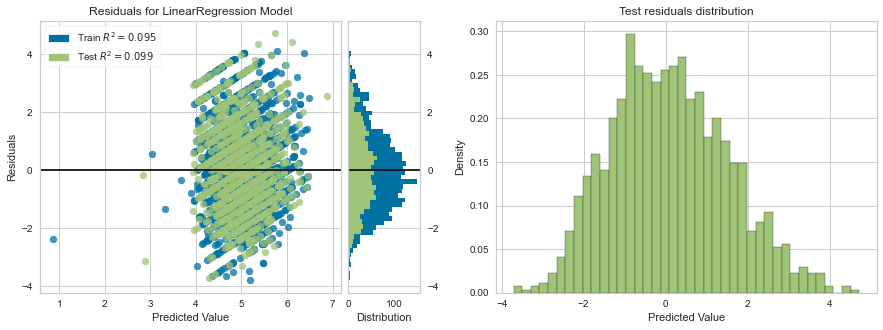

In [13]:
# Residual plot from sklearn visualizer yellowbrick
from yellowbrick.regressor import ResidualsPlot

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Yellowbrick plot
visualizer = ResidualsPlot(lr, ax=ax[0])
visualizer.fit(X_train, y_train)          # Fit the training data to the visualizer
visualizer.score(X_test, y_test)          # Evaluate the model on the test data

# Zoom on test residuals distrbution
residuals = reg.predict(X_test) - y_test
ax[1].hist(residuals, bins=40, density=True, color='g', edgecolor = 'k')
ax[1].set(title="Test residuals distribution",xlabel="Predicted Value", ylabel="Density")
visualizer.show()  
plt.show()

We can see on the left plot both the repartition and the distribution of the data for training and testing sets. The plot also indicates $R^2$ values for training and testing sets. Fortunately, we can see that the $R^2$ score is the same as the one we found before. We also highlighted the distribution of residuals for the testing set on the right plot. Note that the ditributions on the left plot are frequency distributions so that we can also visualize the difference in the amount of data between training and testing sets. On the other hand, the right plot's distribution is a density distribution as we are not comparing its amount of data to anything else.

In [14]:
# List of  probabilities to be off by 2 points through shuffling iterations
probas = list()
N = 1000

for i in range(N):  
    # Create newly shuffled training and testing sets and calculate residuals
    X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df.ratings, train_size=0.7, shuffle=True)
    reg = lr.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    residuals = y_test-y_test_predicted  
    
    # Probability that the prediction is off by more than 2 points
    probas.append((residuals.abs() > 2).sum()/residuals.shape[0])
    
probas = np.sort(probas)

# 90% boostraped confidence interval
ci = (np.percentile(probas, 5), np.percentile(probas, 95))
print("Probability that the prediction is off by more than 2 points: %.3f" %probas.mean())
print("There is 90%% chance that the real probability is in the confidence interval: [%.3f;%.3f]" %(ci[0],ci[1]))

Probability that the prediction is off by more than 2 points: 0.162
There is 90% chance that the real probability is in the confidence interval: [0.148;0.175]


###### Task 1.3.4 - Discuss
We decided to include as new features: `arxiv`, `has_top_institution`, `has_top_company`. 
- `arxiv` tells if the paper appeared in pre-prints. The objective of this study is to assess the relation between this variable and `decisions` variable which is directly related to `ratings`. Indeed it is possible that pre-prints influence the decisions as it breaks anonymity, so adding this feature seems judicious.
- `has_top_institution` can also be correlated to the decisions and especially through `arxiv`. Indeed, it is plausible that reviewers are influenced by the fact that some authors from the paper belongs to a top institution. 
- `has_top_company` is similar to `has_top_institution` and it is plausible that authors from top companies can influence reviewers in their ratings.

###### Task 1.3.5


In [15]:
new_features = ['has_top_company','has_top_institution','arxiv']

# Reinitialize training and testing sets with the new variables (still same seed)
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols+new_features], df.ratings, train_size=0.7, 
                                                    random_state=811)

reg = lr.fit(X_train, y_train)
print("Random R2 score after adding new features: %.3f" %reg.score(X_test,y_test))

Random R2 score after adding new features: 0.112


We can see that we managed to increase the $R^2$ score by adding new features which means that these new features help to better predict the ratings of the papers by giving more correlation information.

### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

###### Task 1.4.1


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Go back to the sets with basic features
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols+new_features], df.ratings, train_size=0.7, random_state=811)

gdr = GradientBoostingRegressor().fit(X_train, y_train)
print("Gradient boosting regressor R2 score: %.3f" %gdr.score(X_test,y_test))

Gradient boosting regressor R2 score: 0.113


We can see that the gradient boosting regressor performs better than the linear regressor in this case. Nevertheless, it can happen that GBR performs poorer (when shuffling the data differently for example).

###### Task 1.4.2


In [17]:
r_plus = df['ratings'] > 4.96

# Verify integrity to be sure that we don't have index duplicates
df['crazy'] = (9 - df['ratings'][r_plus]).append(-df['ratings'][~r_plus], verify_integrity=True)

# New sets with crazy as only feature (still same seed)
X_train, X_test, y_train, y_test = train_test_split(df.crazy, df.ratings, train_size=0.7, random_state=811)

gdr = GradientBoostingRegressor().fit(X_train.values.reshape((-1,1)), y_train)
lr = LinearRegression().fit(X_train.values.reshape((-1,1)), y_train)

print("Gradient boosting regressor R2 score: %.3f" %gdr.score(X_test.values.reshape((-1,1)), y_test))
print("Linear regression R2 score: %.3f" %lr.score(X_test.values.reshape((-1,1)), y_test))

Gradient boosting regressor R2 score: 1.000
Linear regression R2 score: 0.423


We can see that the $R^2$ score for gradient method is equal to 1 while linear regression performs poorer. This is due to the possiblity for GBR to catch discontinuities in the data where linear regression could only reach a score of 1 if the feature was an affine transformation of the variable to predict: $y =a*x + b$. For example, if we had: $crazy = 9-ratings$ with a = -1 and b = 9 (same formula for all ratings, without a discontinuity) the $R^2$ for the linear regression would be 1 as well.

###### Task 1.4.3 - Discuss

Gradient boosting regressor method is able to divide the prediction model into an ensemble of weak prediction models like decisions trees. In our case, the model would typically be divided in $>4.96$ and $<4.96$ decision trees. The trees are then trained sequentially by boosting and optimized with a least square loss function. Each tree is trained to predict error residuals of previous trees. In our case, it is just as if two regressions were calculated for each of $9-ratings$ and $-ratings$. Therefore, the regression is optimal and the resultsing $R^2$ score is 1.

### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

###### Task 1.5.1

In [18]:
def cross_validation(estimator, X, y, cv):
    """ Same arguments than cross_validate function from sklearn.
        Function uses numpy instead of pandas for efficiency """
    
    r2 = list()
    size = X.shape[0]
    fold_length = int(size/cv)
    
    for fold in range(cv):
        # Indices
        test_indices = np.arange(fold_length*fold, fold_length*fold + fold_length)
        train_indices = np.setdiff1d(np.arange(0, size), test_indices )
        
        # Sets
        X_test , y_test  = X[test_indices,:], y[test_indices] 
        X_train, y_train = X[train_indices,:], y[train_indices]
        
        # Estimation
        reg = estimator.fit(X_train,y_train)
        r2.append(reg.score(X_test,y_test))

    return r2

In [19]:
def mean_and_ci(r2_scores):
    """ Calculates the mean and the 90% bootstrapped interval of R2 scores.
        r2_scores is of shape (nb_params, nb_cv) and contains r2 scores for
        all folds for each pair of parameters. """

    r2_mean = r2_scores.mean(axis=1)
    lower_cap = np.percentile(r2_scores, 5,  axis=1)
    upper_cap = np.percentile(r2_scores, 95, axis=1)
    
    return r2_mean, np.array([lower_cap, upper_cap])

###### Task 1.5.2

In [20]:
from itertools import product
from sklearn.model_selection import cross_val_score

cv = 20
# List of the 18 possible pairs of parameters
param_perms = list(product([50,75,100,150,200,250], [0.1,0.05,0.01]))

r2_scores     = np.zeros((len(param_perms),cv))
r2_scores_skl = np.zeros((len(param_perms),cv))

# Get train and test sets with new features included
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols+new_features], df.ratings, train_size=0.7, random_state=811)

for i, params in enumerate(param_perms):
    gdr = GradientBoostingRegressor(n_estimators=params[0], learning_rate=params[1])
    # Implemented function
    r2_scores[i,:]     = cross_validation(gdr, X_train.values, y_train.values, cv)
    # Sklearn
    r2_scores_skl[i,:] = cross_val_score(gdr, X_train, y_train, cv=20)

We found interesting to report $R^2$ scores and bootstraped intervals in a plot to better visualize the differences between each pair of parameters. We also compare our results with `cross_validate` function from sklearn:

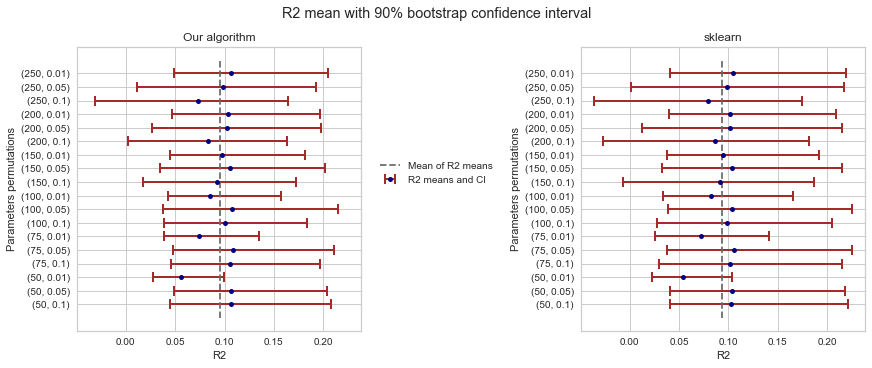

In [21]:
# Report of R2 score mean and confidence interval for every pair of parameters
fig, ax = plt.subplots(1, 2, figsize=(12,5), sharex=True, constrained_layout=True)

for i, r2 in enumerate([r2_scores, r2_scores_skl]):  
    r2_mean, r2_ci = mean_and_ci(r2)
    
    ax[i].errorbar(r2_mean, list(map(str,param_perms)), xerr= np.abs(r2_ci-r2_mean), linewidth = 2, ecolor='brown',
                   linestyle = 'none',marker = 'o',markersize= 5,
                   markerfacecolor = 'navy',markeredgecolor = 'navy', capsize= 5,capthick=2)

    ax[i].vlines(r2_mean.mean(), -1, len(param_perms), linestyle = '--',color='dimgray')
    ax[i].set_xlabel("R2")
    ax[i].set_ylabel("Parameters permutations")
    

ax[0].set_title("Our algorithm")
ax[1].set_title("sklearn")
ax[0].legend(["Mean of R2 means","R2 means and CI"], loc=[1.05,0.5])
plt.suptitle("R2 mean with 90% bootstrap confidence interval")
plt.show()

We can see that some pairs of parameters are not convenient at all for this regression like (50,0.01), (75,0.01), (100, 0.01) which are parameters with low learning rate and small number of estimators. Other pairs of parameters seem to worth each other and the best pair of parameters can change depending on how the data is shuffled. We also see that our results are very close to sklearn ones but not exactly the same. This is because of the indexation of `cross_validate` function which doesn't divide the training set in the same portions as we do ( still with same sizes though).

###### Task 1.5.3

In [22]:
best_params = param_perms[np.argmax(r2_mean)]

gdr = GradientBoostingRegressor(n_estimators=best_params[0], learning_rate=best_params[1])
gdr.fit(X_train, y_train)

print("Best pair of parameters (n_estimators, learning_rate):", best_params)
print("Gradient boosting regressor R2 score: %.3f" %gdr.score(X_test,y_test))

Best pair of parameters (n_estimators, learning_rate): (75, 0.05)
Gradient boosting regressor R2 score: 0.117


We can see that we obtained the best score since the beginning with the optimal parameters that we found with cross-validation.


By computing the best parameters, we only computed the max R2 without taking in account the Confidence Interval computed. If one R2 had a value of 0.15 with a very small confidence interval and another had a bigger value of R2 (like 0.16) but with a significantly large confidence interval, it would be better to choose the value of 0.15 even though it is a little bit smaller. However, in our case here, we see that for the biggest R2 scores, the confidence intervals are almost the same and therefore it makes sense to simply choose the bigger R2.

###### Task 1.5.4 - Discuss

Training the hyper-parameters on the testing set would give better results for predicting data on the test set. However, for real life applications, we don't have access to the testing data and therefore the goal is to make the best prediction on unseen test data based on accessible training data. Therefore, it doesn't make sense for real life applications to tune hyperparameters on the test data.

We can also see it as the following. If we tune our parameters on the testing set and choose our best parameters accordingly, we won't have any set to test whether or not our best parameters can actually generalize to independent sets. That is why we must first use validation sets in the training set during cross-validation to choose our best parameters. Then, we can use the testing set to judge if the method to choose the best parameters was efficient. So, when choosing hyper-parameters, it is important to use cross-validation to validate the method of evalution performance rather than validating the model performance directly.

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

###### Task 2.1.1

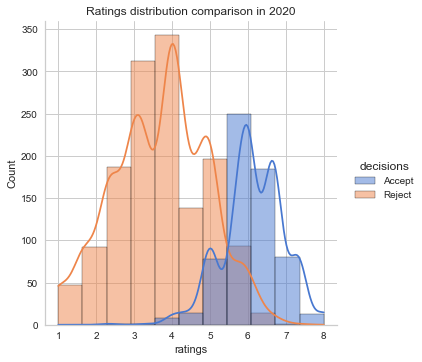

In [23]:
import seaborn as sns

df_2020 = df[df['year']==2020].reset_index(drop=True)

ax = sns.displot(df_2020,x='ratings', hue='decisions', kde=True, bins=11, palette='muted')
plt.title("Ratings distribution comparison in 2020")
plt.show()

###### Task 2.1.2

In [24]:
from scipy import stats 
import statsmodels.api as sm

df_2020_accept = df_2020[df_2020['decisions'] == 'Accept']['ratings']
df_2020_reject = df_2020[df_2020['decisions'] == 'Reject']['ratings']

The following tests are testing if different chracteristics from a normal distribution belongs to our data. `skewtest` tests the symmetry of the data and if it is heavy tailed or not. `kurtosistest` tests whether the data has a normal kurtosis (bending). The `normaltest` from `sklearn` tests a compromise between the two tests cited above by summing their z-score to the square $(s^2+k^2)$. This result is used as the new z-score.

In [25]:
print(stats.skewtest(df_2020_reject))
print(stats.kurtosistest(df_2020_reject))
print(stats.normaltest(df_2020_reject))

SkewtestResult(statistic=-1.4648019448734573, pvalue=0.14297496111124464)
KurtosistestResult(statistic=-4.669298875340496, pvalue=3.0222941958848382e-06)
NormaltestResult(statistic=23.94799672496108, pvalue=6.3060670606361895e-06)


We see that p-value for the skewness test is high. As the null hypothesis was that the data has a skewness similar to the one of a normal distribution, we can say that our data has a normal distribution from the skewness point of view. On the other hand, the kurtosis test was not such a success as its p-value is very close to 0. Inevitably, the normal test from `sklearn` (combinaison of the two other tests) gives the same poor result.

Another more visual way of comparing the distribution of our data to the normal distribution is by doing a QQ plot. 
We scale our distributions to normalize it and to compare to the standard normal, which is exactly the same as comparing it to a normal with mean sample mean and variance sample variance.

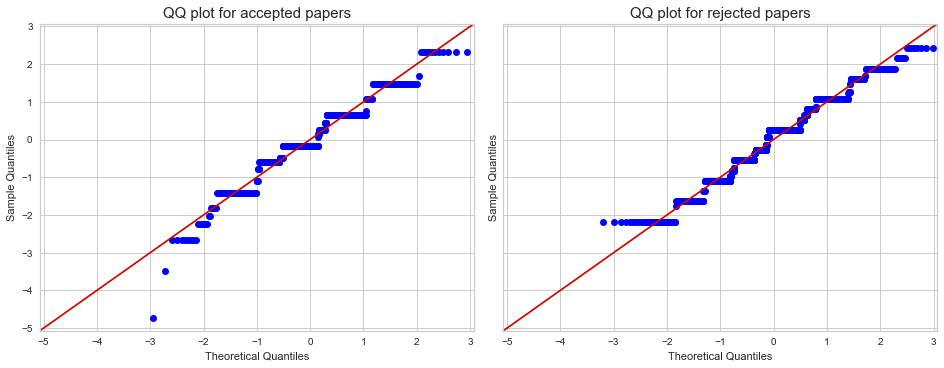

In [26]:
fig, ax = plt.subplots(1,2,figsize=(13,5), sharex=True, sharey=True, constrained_layout=True)

# QQplots compare data to a standard normal distribution by default
sm.qqplot((df_2020_accept-df_2020_accept.mean())/ df_2020_accept.std(), line ='45', ax=ax[0])
sm.qqplot((df_2020_reject-df_2020_reject.mean())/ df_2020_reject.std(), line ='45', ax=ax[1])
ax[0].set_title('QQ plot for accepted papers', fontsize=15)
ax[1].set_title('QQ plot for rejected papers', fontsize=15)
plt.show()

We can see that the points are near the 45 degrees line and therefore, it is coherent to consider the distribution as normal. The fact that we see some fast rises in the plots is due to the fact that the data doesn't take continuous ratings, but instead lots of values appear directly at some ratings instead of being continously distributed. For example, between 5 and 6, we only have ratings of 5.25, 5.5, 5.667 and 5.75. 

Then, we can do a Leven test to see how likely it is that both distribution variances are the same, which is important before doing a test that compares two means.

In [27]:
print("Levene test results for equal variance:", stats.levene(df_2020_accept, df_2020_reject))

Levene test results for equal variance: LeveneResult(statistic=116.98480878312574, pvalue=1.4848570754018555e-26)


The p value is very small so we can reject the null hypothethis that the two variances are the same.

Based on the previous results, we assume that the two distributions are normal with different variances. 
One appropriate test to compare the two means is the t-test considering different variances (also called the Welch t-test). 

But first, let's look at the two means of our arrays:

In [28]:
print("Mean of ratings of accepted papers: %.3f" %df_2020_accept.mean())
print("Mean of ratings of rejected papers: %.3f" %df_2020_reject.mean())

Mean of ratings of accepted papers: 6.139
Mean of ratings of rejected papers: 3.683


We see that the mean for accepted papers is much higher than the one for rejected papers. The most adequate test would then be a one-tailed test as we are pretty sure that if the means are not similar, then they are not similar because the mean for accepted papers is much higher than the one of the rejected papers (and not the opposite). As we have a symmetric distribution, we would just need to divide our p-value by two.

In [29]:
res = stats.ttest_ind(df_2020_accept, df_2020_reject, equal_var=False, nan_policy='propagate')
print("T-test results for identical average:", res)

T-test results for identical average: Ttest_indResult(statistic=53.56214101855919, pvalue=0.0)


###### Task 2.1.3 - Discuss

The p value is 0 up to computer precision (it cannot strictly be 0 here) , we reject the null hypothethis that the two distributions have the same mean.
The p-value is the probability of observing a value of the statistic (here 53.56) as or more extreme than the one we observed under the null hypothesis. Concretely, here, it is very unlikely to obtain such a statistic under the hypothesis that the two means are the same, and therefore it is very likely that the two means are different. Note also that we do not even have to divide our p-value by two as the resulting one-tailed p-value would be less than 0.05 (or two-tailed p-value less than 0.025) anyway.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.26$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


###### Task 2.2.1

In [30]:
import statsmodels.formula.api as smf


df_2020['decisions'] = (df_2020['decisions']=='Accept').astype(int)

mod = smf.logit(formula='decisions ~ ratings ', data=df_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        23:47:45   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.8811      0.597    -21.574      0.000     -14.051     -11.711
ratings        2.3672      0.

###### Task 2.2.2 - Discuss

We can see on the summary that the intercept $b_0$ is -12.88 and that the ratings coefficient $b_1$ is 2.37, so the equation becomes: $d = -12.8811 + 2.3672*r$

Then, the probability that a paper with a score of 7 is accepted is: 

$$\frac{p}{1-p} = e^{b_0} e^{b_1 x_1}= e^{-12.8811} e^{2.3672*7}=40.0168 \implies p=\frac{40.0168}{1+40.0168}=0.9756$$

Based on our coefficients and the formula for odds, we have a probability of 0.9756 that a paper of score 7 is accepted. If we normalize ratings before doing the regression, we obtain 40.0240 instead of 40.0168 which is very similar. Also, instead of using 7 as score we would need to use its normalization.

In [31]:
# Calculations
B0, B1, x = -12.8811, 2.3672, 7
alpha = np.exp(B0 + B1*x )
p = alpha / (1 + alpha)
print('Probability that a paper of score 7 is accepted is : %.4f' %p)

Probability that a paper of score 7 is accepted is : 0.9756


### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

In [32]:
mod = smf.logit(formula='decisions ~ ratings + reputation + C(arxiv) ' , data=df_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.250440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5936
Time:                        23:47:45   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -13.2261      0.634    -20.873      0.000     -14.468     -11.984
C(arxiv)[T.

`arxiv` coefficient (0.289) reflects the change in odds if a paper was spotted in a pre-print or not. For the same fixed parameters (`ratings`, `repution`), the odds of being accepted are multiplied by $ e^{0.289}=1.33 $ if the paper was spotted in a pre-print, compared to if it wasn't. 
For example, if a paper with a certain rating and reputation, which was not spotted in the pre-prints had p = 0.7 of being accepted, its odds are :
$$ \frac{0.7}{1-0.7} = 2.333 $$
If `arxis = 1`, the new odds are : 
$$ 2.333*e^{0.289} = 3.115 \implies p=\frac{3.115}{1+3.115}=0.76 $$ 
It only has a negligible impact on the resulting probabily and the coefficient is too small to have a signficant impact. Thus, the effect of `arxiv` is not satistically significant.

We can also directly compute the new odds if `arxiv = 1`  compared to `arvix = 0` for any p (except for p=1 to avoid division by 0).


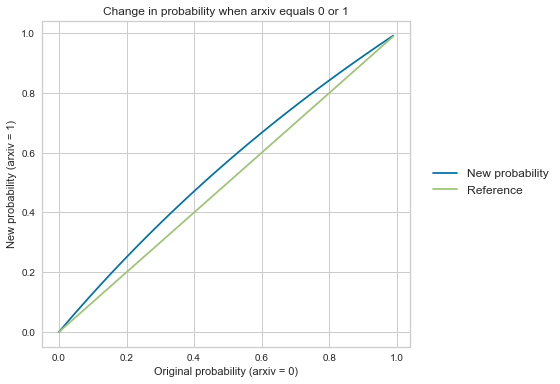

In [33]:
# This functions computed the new probability if the value corresponding to the coefficient goes from 0 to 1. 
# It is the same computation as the one described above, but generalized to any starting probability
def new_prob(x, coeff) : 
    return np.exp(coeff)*(x/(1-x))/(1+np.exp(coeff)*(x/(1-x)))

x1 = np.linspace(0, 0.99, 100)
x2 = [new_prob(i, 0.289) for i in x1]

# Plot
plt.plot(x1, x2)
plt.plot(x1, x1)
plt.title('Change in probability when arxiv equals 0 or 1', fontsize=12)
plt.xlabel("Original probability (arxiv = 0)")
plt.ylabel("New probability (arxiv = 1)")
plt.legend(['New probability','Reference'],fontsize=12, loc=[1.05,0.45])
plt.tight_layout()
plt.show()

The resulting plot is very close to a straight line, and reflects the very small change in probability if `arxiv` changes from 0 to 1. So the change in probability from `arxis = 0` to `arxiv = 1` is not significant. <br> In addition, we can say that the effect is statistically significant when the null hypothesis is rejected (the null hypothesis is that the coefficient is 0 and thus that there is no effect). In our case, the p value corresponding to arxiv is 0.0884 > 0.05; we cannot reject the null hypothesis that the coefficient of arxiv is 0. 

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

In [34]:
mod = smf.logit(formula='decisions ~ ratings + reputation + C(arxiv) + C(has_top_institution) +'
                        'C(arxiv):C(has_top_institution)', data=df_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.247320
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5987
Time:                        23:47:45   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                               

Let `x1 = arxiv`, with B1 its coefficient; `x2 = has_top_institution`, with B2 its coeffiient, B3 the coefficient for the interaction variable ,`x4 = ratings`, with B4 its coefficient, and `x5 = ratings`, with B5 its coefficient.  B0 is the intercept, we have : 

$$ log(\frac{p}{1-p}) = B0 + B1x1 + B2x2 + B3x2x1 + B4x4 + B5x5 = B0 + B1x1 + x2(B2 + B3x1) + B4x4 + B5x5 $$ 

Written like that, we can see in the right side of the equation that the impact of the odds of x2 (`has_top_instituion`), depends on B2, but also on B3 and the value of `arxiv`, if it is 0 or 1. In other words, B3 is the difference between the log-odds comparing `has_top_institution = 0 or 1`  when `arvix = 0` and the odds comparing `has_top_company = 0 or 1` when `arxiv = 1`. <br> This coefficient (0.5793) is not negligeble relative to others, which means that there is a difference in odds change for `has_top_company` when we look at pre-prints, i.e when reviewers look at pre-prints, knowing `has_top_instituion` influences their rating. `arxiv` therefore breaks double blind submission.

In [35]:
#We can see that blind submission is broken, the impact of has_top_instituion is significantly bigger if arxiv = 1 than it 
#is if arxiv = 0 
p2 = new_prob(0.8, 0.3662)
p3 = new_prob(0.8, 0.3662 + 0.5793)
print("if prob of being accepted is 0.8, has_top = 0 and arxiv = 0, the prob if has_top = 1 becomes " +  str(p2)  )
print("if prob of being accepted is 0.8, has_top = 1 and arxiv = 1, the prob if has_top = 1 becomes " + str(p3)  )

if prob of being accepted is 0.8, has_top = 0 and arxiv = 0, the prob if has_top = 1 becomes 0.8522671376862144
if prob of being accepted is 0.8, has_top = 1 and arxiv = 1, the prob if has_top = 1 becomes 0.9114762258652682


The above calculation is a strong statement in order to show that arxiv breaks double-submission. It says that the change in probability from has_top_institution = 0 to has_top_institution = 1 is more important when arxiv = 1 than arxiv = 0 : looking at the preprints influences the rating. In a sense, the change in probability when arxiv = 0 is the implicit impact of a better institution (implicitly they have better ratings), whereas the change in probability when arxiv = 1 reflects more the explicit impact of a better insitution, as the reviewer giving the grade can have this information. If `arxiv` didn't break the double-submission, the changes in probabilities would be almost the same.

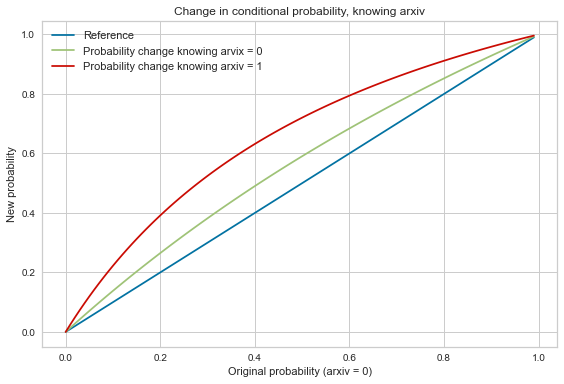

In [36]:
x1 = np.linspace(0, 0.99, 100)
x3 = [new_prob(i, 0.3662) for i in x1]
x4 = [new_prob(i, 0.3662 + 0.5793) for i in x1]
# Plot
plt.plot(x1, x1)
plt.plot(x1, x3)
plt.plot(x1, x4)
plt.title('Change in conditional probability, knowing arxiv', fontsize=12)
plt.xlabel("Original probability (arxiv = 0)")
plt.ylabel("New probability")
plt.legend(['Reference','Probability change knowing arvix = 0', 'Probability change knowing arxiv = 1'],fontsize=11)
plt.tight_layout()
plt.show()

The plot shows the same discussion for any probability, and support our claim that arxiv breaks double blind submission, as we can see that the value of arxiv clearly influences the impact of `has_top_institution` on the change of probability of being accepted.

We can have same reasoning as before with the p-values. We see that the p-value for `arxiv` is high (~0.6) which means that it is not much correlated to the decisions. On the other hand, `has_top_institution` has the lowest p-value after `ratings` (0.103) which means it is more correlated. The interesting fact is that when looking at the p-value of their intersection coefficient (0.117), we can see that it stays low (much closer to `has_top_institution` than `arxiv`). That can actually proove, in our opinion, that `arxiv` finds its effect when it is linked to `has_top_institution`. Therefore, it also goes towards the idea that `arxiv` breaks double-blind submissions.

Another idea is to remove features that are not significant such as `arxiv`. In the following logistic regression, we removed `arxiv` only. We can see that the p-value for the intersection of `arxiv` and `has_top_institution` then becomes 0.028 < 0.05. This means that `arxiv` feature has a negative impact on its intersection with `has_top_institution` and removing it accentuated the correlation between `decisions` and the intersection `has_top_institution:arxiv`. Again, this goes toward the fact that `arxiv` breaks double submissions through `has_top_institution`.

In [37]:
mod = smf.logit(formula='decisions ~ ratings + reputation  + C(has_top_institution) +'
                        'C(arxiv):C(has_top_institution)', data=df_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.247320
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5987
Time:                        23:47:46   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the regressor that you trained in Step 1?

**Hint:** For this classifier we don't need a training set and a test set!


###### Task 3.1.1

In [38]:
ps = pd.read_csv(DATA + 'propensity_scores.csv.gz')
display(ps.sample(4))

,paper,propensity_score
1082,Fully Convolutional Graph Neural Networks usin...,0.165117
98,Action Semantics Network: Considering the Effe...,0.310609
1671,Robust saliency maps with distribution-preserv...,0.331004
75,Pseudo-LiDAR++: Accurate Depth for 3D Object D...,0.441368


In [39]:
df_2020 = df_2020.merge(ps, on='paper', validate='one_to_one')
display(df_2020.head(4))

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,crazy,propensity_score
0,2020,Pitfalls of In-Domain Uncertainty Estimation a...,Arsenii Ashukha;Alexander Lyzhov;Dmitry Molcha...,6.666667,1,Samsung;Skolkovo Institute of Science and Tech...,"[-1, -1, -1, 481]",0,"[488, 12, 481, 2097]","[14, 2, 17, 124]","[8, 1, 7, 16]",False,484.5,15.5,7.5,1.253127,0,0,2.333333,0.360486
1,2020,An Inductive Bias for Distances: Neural Nets t...,Silviu Pitis;Harris Chan;Kiarash Jamali;Jimmy Ba,6.750000,1,"Department of Computer Science, University of ...","[18, 18, 18, 18]",1;10,"[15, 23, 3, 52924]","[9, 13, 3, 56]","[2, 3, 1, 22]",False,19.0,11.0,2.5,2.975924,0,0,2.250000,0.567842
2,2020,Stochastic AUC Maximization with Deep Neural N...,Mingrui Liu;Zhuoning Yuan;Yiming Ying;Tianbao ...,6.000000,1,University of Iowa;University of Iowa;State Un...,"[154, 154, 266, 154]",9,"[238, 112, 2144, 3236]","[29, 12, 64, 187]","[9, 4, 24, 29]",True,1191.0,46.5,16.5,1.262565,0,0,3.000000,0.334322
3,2020,On the interaction between supervision and sel...,Ryan Lowe*;Abhinav Gupta*;Jakob Foerster;Douwe...,6.666667,1,McGill University;University of Montreal;Faceb...,"[86, 128, -1, -1, 86]",3,"[3343, 36, 2107, 3454, 11328]","[53, 10, 58, 80, 267]","[17, 3, 19, 29, 46]",False,3343.0,58.0,19.0,1.637759,1,0,2.333333,0.402644


###### Task 3.1.1 - Discuss
With this classifier, we don't have any labels to tell if our propensity score predictions are correct. So, we are using unsupervised learning. In the regressor from task 1, we had the labels in the `decisions` column so we were able to train and test the regressor based on these labels (regression is a subset of supervised learning).

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

###### Task 3.2.1


In [40]:
import networkx as nx

treatment = df_2020['propensity_score'][df_2020['arxiv']==True]
control   = df_2020['propensity_score'][df_2020['arxiv']==False]

print("Treatment size: %d" %treatment.shape[0])
print("Control size: %d" %control.shape[0])

Treatment size: 590
Control size: 1462


We notice that we have 590 samples for treatment (`arxiv = 1`) and 1462 samples for control (`arxiv = 0`). So, intuitively, the maximum number of matches will be 590. To calculate the matchings, we use `networkx` function `minimum_weight_full_matching` which is straightforward. 

We also create a function that builds a dataframe with the following results:
- Mean of the absolute difference between two propensity scores in a matching pair: 
$\frac{1}{N} \sum_i^N  |p_{treat}^{(i)} - p_{control}^{(i)}|$
- Number of matched pairs that we found.
- Number of unmatched papers
- Number of unique papers found in every matched papers to verify that it is a one-to-one matching (number of unique should be twice the number of matched pairs).


In [41]:
def matching_results(best_matches_idx, treatment, control):
    """ Builds a dataframe for several results. """
    
    # Propensity values associated to matches indices
    treatment_matches = treatment.loc[best_matches_idx.keys()].values
    control_matches   = control.loc[best_matches_idx.values()].values
    
    data = {
        'Error mean'                : np.mean(np.abs(treatment_matches - control_matches)),
        'Number of matched pairs'   : len(best_matches_idx),
        'Number of unmatched papers': treatment.shape[0] + control.shape[0] - 2*len(best_matches_idx),
        'Number of uniques'         : np.unique(np.array(list(best_matches_idx.items())).flatten()).shape[0]
    }
    
    return pd.DataFrame(data, index=['Results'])


def caliper_matching(treatment, control, e):
    """ Create biparite graph treatment/control and add the difference 
        of propensity scores as weights. Returns a dictionnary of 
        matchings where keys are treatment and values are control. """
    
    B = nx.Graph()
    
    # Construct a biparite graph where weights are the difference between the propensity scores
    for t_id, t in treatment.items():
        for c_id, c in control.items():
            w = abs(t-c)
            if w < e:
                B.add_weighted_edges_from([(t_id, c_id, w)])
    
    # Minimum weight matching
    matching = nx.bipartite.minimum_weight_full_matching(B, treatment.index.values)
    
    # Reorganize matching dictionnary to have treatment as keys and control as values 
    best_matches_idx = dict()
    for key in matching.keys():
        if key in treatment.index:
            best_matches_idx[key] = matching[key]
    
    return best_matches_idx

Note that the result of `minimum_weight_full_matching` function returns a dictionnary with duplicated matches. For example, if 1:3 is a match, then 3:1 is also a match and both are added to the dictionary. Therefore, we need to remove these duplicates and reorganize the dictionnary so that we have the treatment as keys and the control as values.

###### Task 3.2.2


In [42]:
%time best_matches_idx = caliper_matching(treatment, control, e=0.05)
display(matching_results(best_matches_idx, treatment, control))

CPU times: user 1.14 s, sys: 48.3 ms, total: 1.19 s
Wall time: 1.19 s


,Error mean,Number of matched pairs,Number of unmatched papers,Number of uniques
Results,0.000293,590,872,1180


With these results, we can see that we manages to find the 590 pairs of matched papers and that the resulting unmatched papers are: 

$$total - 2*matches = (1462 + 590) - 2*590 = 872$$

We can also see that we have a one-to-one matching as the number of unique papers is twice the number of matched pairs.

### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

In [43]:
def plot(df, best_matches_idx=None, matches_only=False, plot_title=None):
    
    data = pd.melt(df, id_vars='arxiv', value_vars=['ratings','reputation'], ignore_index=False)
    
    if matches_only is True:
        data = pd.concat([data.loc[best_matches_idx.keys()], data.loc[best_matches_idx.values()]])

    # Plot 
    ax = sns.displot(data, x='value', hue='arxiv', col='variable', 
                     hue_order=[True, False], kde=True, palette='gist_rainbow')
    plt.suptitle(plot_title)
    ax.tight_layout()
    plt.show()

###### Task 3.3.1

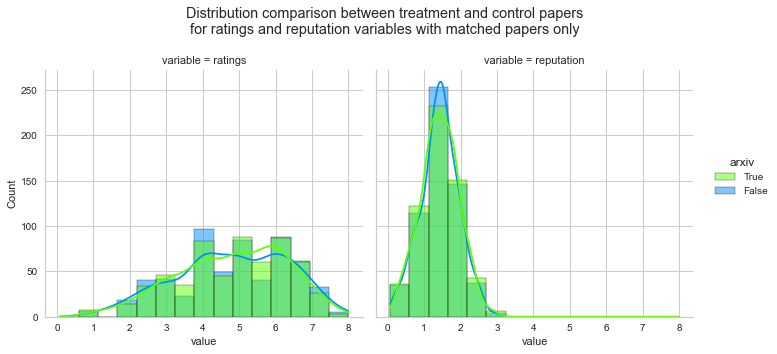

In [44]:
plot(df_2020, best_matches_idx, matches_only=True, plot_title= \
     "Distribution comparison between treatment and control papers\n"
     "for ratings and reputation variables with matched papers only")

###### Task 3.3.2

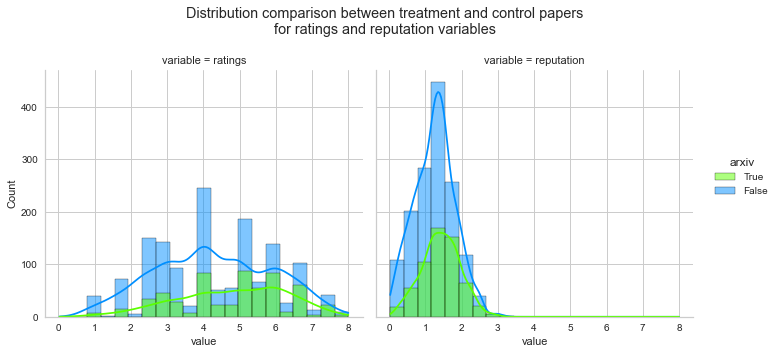

In [45]:
plot(df_2020, plot_title= "Distribution comparison between treatment and control papers\n"
                          "for ratings and reputation variables")

###### Task 3.3.3 - Discuss
First, we can see that the matching did a good job at balacing `ratings` as we can clearly see that the distributions when `arxiv = 0` and `arxiv = 1` were different before matching and very close after matching. For `reputation` variable, the `arxiv` distributions were already similar before matching (only the amount of data differed) so the matching basically helped to get the same amount of data for both `arxiv` conditions. We can also tell that the propensity scores found with the classiffier divides the papers well as both variables are well matched.

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


In [46]:
def ate_mean_and_ci(y_treat, y_control, partitions):
    """ Calculate the ATE for the decisions as well as its 95% bootstrapped confidence
        interval by calculating mutliple means of equally divided array partitions. """
        
    # We devide the indices into random partitions to calculate the bootstrapped CI
    indices = np.random.permutation(np.arange(y_treat.shape[0]))[0:]
    means = np.mean(y_treat[indices] - y_control[indices], axis=1)
    lower_cap, upper_cap = np.percentile(means, 5), np.percentile(means, 95)
    ate = np.mean(means)
    
    return ate, lower_cap, upper_cap

In [47]:
y_treat = df_2020['decisions'][best_matches_idx.keys()].values
y_control = df_2020['decisions'][best_matches_idx.values()].values

ate, lower_cap, upper_cap = ate_mean_and_ci(y_treat, y_control, 10)

print("ATE: %.3f" %ate)
print("There is 95%% chance that the real mean lies into the confidence interval: "
      "[%.3f;%.3f] "%(lower_cap, upper_cap))

ATE: 0.029
There is 95% chance that the real mean lies into the confidence interval: [-0.045;0.113] 


Ideally, to show that `arxiv` treatment is heavily correlated to `decisions`, the treatment effect would be 1 (or -1 if we reversed treatment and control) and the worst would be 0. Here, as we have a small deviation from 0, we cannot tell that all papers appearing in pre-prints influence decisions in a determinant manner.

We calculated the bootstrapped interval for the mean by dividing the data into 10 subsets. We chose 10 partitions because first of all it divides the data in whole parts. It also allows us to have sufficient data in each partition and thus have accurate means. And it also allows is to have sufficient partitions to have an accurate confidence interval. We can see that the confidence interval found varies a lot when shuffling the indices and that it's very wide. This is mostly due to the small number of samples. Nevertheless, the upper cap is still larger than the lower cap (obsolute value of lower cap) which is coherent with the fact that the calculated ATE is positive. Note that boostraping with replacement would have been better to have more accurate intervals.

### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

###### Task 3.5.1

In [48]:
df_2020_top = df_2020[df_2020['has_top_institution']==True]

treatment = df_2020_top['propensity_score'][df_2020_top['arxiv']==True]
control   = df_2020_top['propensity_score'][df_2020_top['arxiv']==False]

print("Treated size: %d" %treatment.shape[0])
print("Control size: %d" %control.shape[0])

Treated size: 161
Control size: 361


In [49]:
best_matches_idx = caliper_matching(treatment, control, e=0.05)
display(matching_results(best_matches_idx, treatment, control))

,Error mean,Number of matched pairs,Number of unmatched papers,Number of uniques
Results,0.001009,161,200,322


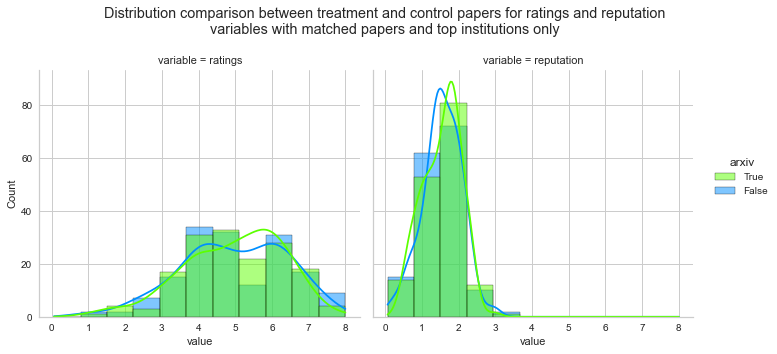

In [50]:
plot(df_2020_top, best_matches_idx, matches_only=True, plot_title= \
     "Distribution comparison between treatment and control papers for ratings and reputation\n"
     "variables with matched papers and top institutions only")

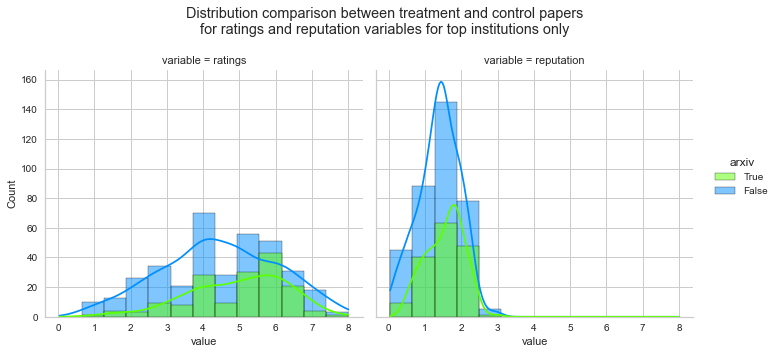

In [51]:
plot(df_2020_top, plot_title= "Distribution comparison between treatment and control papers\n"
                              "for ratings and reputation variables for top institutions only")

In [52]:
y_treat = df_2020_top['decisions'][best_matches_idx.keys()].values
y_control = df_2020_top['decisions'][best_matches_idx.values()].values

ate, lower_cap, upper_cap = ate_mean_and_ci(y_treat, y_control, 7)

print("ATE: %.3f" %ate)
print("There is 95%% chance that the real mean lies into the confidence interval: "
      "[%.3f;%.3f] " %(lower_cap, upper_cap))

ATE: 0.106
There is 95% chance that the real mean lies into the confidence interval: [-0.078;0.248] 


###### Task 3.5.2 - Discuss

We see that the ATE coefficient was multiplied by more than 3 and augmented from 0.029 to 0.106 when looking at the treatment with top institutions only. Now the deviation from 0 starts to be significant. This shows that the fact that a paper appears in pre-prints and that one of its authors belongs top a top institution, influences the reviewers to accept the paper. Therefore it is evidence that `arxiv` breaks double-blind submissions.